# Práctica 3. Cadenas de Markov


### 1. Autovalores, autovectores y diagonalización de matrices con Python


Empezamos esta práctica con una breve introducción al cálculo con Python de **autovalores y autovectores** de matrices. La instrucción `la.eig(A)` nos permite obtener tanto los autovalores como los autovectores de una matriz cuadrada $A$. Como observación, cabe destacar que los autovalores los devuelve en forma de número complejo, siendo `j` el número imaginario $i$.

In [ ]:
import numpy as np
from scipy import linalg as la

In [ ]:
A=np.array([[1,3,3],[-3,-5,-3],[3,3,1]])
autovalores, autovectores = la.eig(A)
print(autovalores)
print(autovectores)

In [ ]:
la.det(autovectores)

Como la matriz formada por los autovectores tiene determinante no nulo, entonces los **autovectores son linealmente independientes**. Por un teorema visto en clase, podemos afirmar que **$A$ es diagonalizable**. Comprobémoslo.

In [ ]:
D=np.diag([1,-2,-2])
P=autovectores
print(np.round(la.inv(P)@A@P,2))      # podemos observar que se trata de la matriz D
print(np.round(la.inv(P)@A@P,2))      # redondeamos a dos decimales para que se vea más claro

### 2. Cadenas de Markov


Supongamos que en la ciudad autónoma de Ceuta, los habitantes realizan sus compras en uno de los dos grandes supermercados existentes: Mercadona o Carrefour. Considerando un determinado período de tiempo, observamos que ciertos clientes deciden cambiar de supermercado debido a motivos como el precio, calidad, publicidad, etc. Concretamente, de un mes a otro, el $80\%$ de los clientes de Mercadona siguen comprando allí y en Carrefour se mantiene el $70\%$ de la clientela. La variabilidad del mercado puede expresarse matemáticamente mediante las siguientes ecuaciones, donde $z_0=(x_0, y_0)$ representan la proporción de clientes en Mercadona y Carrefour en un determinado mes, respectivamente, y $z_1=(x_1, y_1)$ el mes siguiente:


$$ \begin{cases} x_1=0.8x_0+0.3y_0\\ y_1=0.2x_0+0.7y_0 \end{cases} \quad \Longrightarrow \quad \begin{pmatrix}
x_1 \\ y_1
\end{pmatrix} = \begin{pmatrix}
0.8&0.3\\
0.2&0.7
\end{pmatrix}\begin{pmatrix}
x_0\\y_0
\end{pmatrix} \quad \Longrightarrow \quad z_1=Mz_0.$$


Análogamente, el mes siguiente tendríamos $z_2=Mz_1=M^2z_0$ y, en general, $z_k=Mz_{k-1}=M^kz_0$. Por tanto, resulta clave poder calcular potencias de $M$ de una manera sencilla para ver qué pasa a largo plazo. Veamos si $M$ es diagonalizable.

In [ ]:
M=np.array([[0.8,0.3],[0.2,0.7]])
autoval, autovec = la.eig(M)
print(autoval) 
print(autovec)

Como $M$ tiene dos autovalores distintos, entonces los autovectores asociados son linealmente independientes y por tanto $M$ es diagonalizable, i.e. $M=PDP^{-1}$. En particular, $M^k=PD^kP^{-1}$. Por tanto:



\begin{eqnarray*}
z_k&=&M^kz_0=PD^kP^{-1}z_0=\begin{pmatrix}0.832&-0.707\\0.554&0.707\end{pmatrix}\begin{pmatrix}1&0\\0&0.5^k\end{pmatrix}\frac{1}{|P|}\begin{pmatrix}
0.707&0.707\\-0.554&0.832\end{pmatrix}\begin{pmatrix}
x_0\\y_0
\end{pmatrix}.
\end{eqnarray*}


Haciendo que $k\rightarrow \infty$, podemos obtener qué pasará a largo plazo. Recordemos que $\lim_{k\rightarrow\infty} 0.5^k = 0$, y además $x_0+y_0=1$ pues representa el porcentaje de población total. 

In [ ]:
print(autovec@np.array([[1,0],[0,0]])@la.inv(autovec))

Deducimos que:


$$
z_{\infty}=\begin{pmatrix} 0.6&0.6\\0.4&0.4\end{pmatrix} \begin{pmatrix}x_0\\y_0\end{pmatrix}= \begin{pmatrix}
0.6 (x_0+y_0)\\0.4(x_0+y_0)
\end{pmatrix}=\begin{pmatrix}
0.6\\0.4
\end{pmatrix},$$ 


luego el $60\%$ de la población de Ceuta terminará comprando en Mercadona y el $40\%$ en Carrefour, **independientemente** del vector de estados iniciales $z_0$.

In [ ]:
z0=np.array([[0],[1]])     # supongamos que toda la población de Ceuta en un determinado mes compraba en Carrefour

from numpy.linalg import matrix_power as mpow 

z20=mpow(M,20)@z0
print(z20)                 # 20 meses después, el 60% acaba comprando en Mercadona y el 40% en Carrefour, como ya sabíamos

In [ ]:
z0=np.array([[0.9],[0.1]])     # supongamos que el 90% de la población de Ceuta en un determinado mes compraba en Mercadona

from numpy.linalg import matrix_power as mpow 

z15=mpow(M,15)@z0
print(z15)                   # 15 meses después, el 60% acaba comprando en Mercadona y el 40% en Carrefour, como ya sabíamos

In [ ]:
print(M@np.array([[0.6],[0.4]]))    # el vector z_infinito es un autovector de M asociado al autovalor 1 !!

Algunos hechos que no son casualidad son los siguientes:

- 1 es autovalor de $M$.
- $z_{\infty}\in E(1)$ y todas sus entradas son no negativas.


**Definiciones.** 
- $z\in\mathbb{R}^n$ es un **vector de probabilidad** si sus entradas son no negativas y suman 1.
- $M\in\mathcal{M}_{n\times n}(\mathbb{R})$ es una **matriz estocástica** si sus columnas son vectores de probabilidad.
- Si $z_k=Mz_{k-1}$ ($k\geq 1$) con $z_0$ un vector de probabilidad y $M$ una matriz estocástica, llamamos **cadena de Markov** a los términos $\{z_0, z_1, z_2,\ldots \}$.
- $z\in\mathbb{R}^n$ es un **vector estacionario** si $Mz=z$ y $z$ es no nulo.
- Si $M$ es matriz estocástica de una cadena de Markov **convergente**, llamamos **vector límite** de la cadena de Markov al vector $z_{\infty}:=\displaystyle\lim_{k\rightarrow \infty} z_k$.



**Teorema.** Si $M\in\mathcal{M}_{n\times n}(\mathbb{R})$ es matriz estocástica de una cadena de Markov, entonces:
- 1 es valor propio de $M$.
- Todos los valores propios de $M$ tienen módulo (o valor absoluto) menor o igual que uno.
- $z_{\infty}$ es un vector de probabilidad estacionario, luego es un autovector de $M$ asociado al $1$ (basta con tomar límites en $z_{k}=Mz_{k-1}$). 



Por tanto, en la práctica, para hallar un posible vector límite no es necesario diagonalizar $M$ y hacer todo el proceso anteriormente descrito: utilizando el teorema anterior, si hallamos los vectores estacionarios de probabilidad y hay solo uno, entonces debe ser el vector límite.



**Ejemplo.** Los vectores $z_k$ del problema anterior de los supermercados de Ceuta forman una cadena de Markov, pues $M$ es una matriz estocástica, ya que sus columnas son vectores de probabilidad. Se puede comprobar (a mano) que los vectores estacionarios de dicha cadena de Markov son los vectores no nulos de $E(1)=\{ \lambda·(3,2)\; : \; \lambda\in \mathbb{R}\}=\{ (3\lambda,2\lambda)\; : \; \lambda\in \mathbb{R}\}$. Por tanto, los vectores estacionarios de probabilidad son $$ \left\lbrace \frac{1}{3\lambda+2\lambda}· (3\lambda,2\lambda) \; : \; \lambda \in\mathbb{R}\smallsetminus\{0\}\right\rbrace=\{(\tfrac{3}{5},\tfrac{2}{5})\}=\{ (0.6,0.4)\}.$$  Como solo hay uno, ha de ser (de hecho, lo es) el vector límite de la cadena de Markov anterior, **independientemente** de la elección de $z_0$.



El teorema nos asegura la existencia de vectores estacionarios de probabilidad en una cadena de Markov. Sin embargo, **no siempre existe un único vector límite**.

In [ ]:
M=np.array([[0.5,0,0],[0,1,0],[0.5,0,1]])        # consideremos esta matriz estocástica
print(M)
z0=np.array([[1/3],[2/3],[0]])                   # consideremos este vector de estados inicial
print(z0)
z50=mpow(M,50)@z0
print(np.round(z50,5))                           # vector límite de la cadena de Markov para dicho z0

In [ ]:
z0=np.array([[1/3],[1/3],[1/3]])                 # consideremos ahora este otro vector de estados inicial
print(z0)
z50=mpow(M,50)@z0
print(np.round(z50,5))                           # vector límite de la cadena de Markov para este nuevo z0

In [ ]:
eigval, eigvec = la.eig(M)
print(eigval)
print(eigvec)                  # luego hay dos autovectores asociados al autovalor 1

De hecho, en este caso 


$$E(1)=\{ \alpha·(0,0,1) +\beta·(0,1,0)\; : \; \alpha,\beta\in\mathbb{R}\} = \{ (0,\alpha,\beta)\; : \; \alpha,\beta\in\mathbb{R}\},$$ 


luego tenemos un conjunto infinito de vectores estacionarios de probabilidad (y los vectores límites anteriores pertenecen a él): 


$$\left\lbrace \frac{1}{\alpha+\beta}·(0,\alpha,\beta)\; : \; \alpha,\beta \in\mathbb{R}\right\rbrace.$$


Hay un determinado tipo de matrices que siempre poseen un único vector estacionario de probabilidad. Por tanto, las cadenas de Markov asociadas a ellas poseerán un único vector límite, para cualquier vector inicial $z_0$.


**Definición.** Una matriz estocástica $M$ es **regular** si existe un número natural $k$ tal que todas las entradas de $M^k$ son estrictamente positivas.


**Teorema.** Si $M$ es una matriz estocástica regular, entonces existe un único vector estacionario de probabilidad $z$ para $M$. Además, si $z_0$ es cualquier vector de probabilidad y $z_k=Mz_{k-1}$ para todo $k\geq 1$, entonces la cadena de Markov converge a $z$.


**Ejemplos.** La matriz del problema de los supermercados de Ceuta es una matriz regular (tomando $k=1$).

### 3. Ejercicios


1. Considera la matriz $M=\begin{pmatrix} 0.05&0.85&0.5\\0.1&0.05&0.1\\0.85&0.1&0.4 \end{pmatrix}$.
   - ¿Es $M$ una matriz estocástica regular?
   - Calcula el conjunto de vectores estacionarios de $M$.
   - Calcula un vector estacionario de probabilidad.
   - Escribe los primeros tres términos de la cadena de Markov asociada a $M$ con vector inicial $z_0=\begin{pmatrix}0.3\\0.5\\0.2\end{pmatrix}$.
   - ¿Es convergente dicha cadena? Responde sin realizar ningún cálculo a mano ni a ordenador.



2. En el mundo del fútbol, el acierto en el lanzamiento de penaltis es en gran medida una cuestión de confianza. Supongamos que un jugador que marcó el último penalti que tiró tiene una probabilidad del 80\% de volver a marcar el siguiente, mientras que un jugador que falló el último penalti que tiró tiene una probabilidad del 40\% de volver a fallar. ¿Cuál es la probabilidad a largo plazo de que un jugador marque un penalti? 


3. Un estudio acerca de los hábitos de fumar en un grupo de personas muestra que la probabilidad de que un fumador continúe fumando un año después es del 65\%, mientras que la probabilidad de que un no fumador continúe sin fumar es del 85\%. Supongamos que estas probabilidades se mantienen a largo plazo. Si cuando comenzó el estudio en el año 1990 el 70\% de los miembros del grupo investigado eran fumadores y el 30\% eran no fumadores, ¿cuáles son los porcentajes de fumadores y no fumadores en 1991, 1992 y 1994? ¿Cuáles serán los porcentajes de fumadores y no fumadores a largo plazo?



4. Supongamos que en un país la evolución de las migraciones internas a lo largo de cierto período de tiempo ha sido la siguiente:
   - Cada año, el 10\% de la población de la capital se traslada a vivir a otra ciudad, y el 5\% se va al medio rural.
   - De los habitantes de otras ciudades, el 15\% emigra a la capital y otro 10\% al medio rural.
   - El 12\% de los habitantes del medio rural emigran a la capital todos los años y el 15\% a otra ciudad.
   
En este contexto, nos planteamos las siguientes cuestiones:

- Si en un determinado momento la población de la capital es el 20\% del total, la de las otras ciudades el 45\% y el 35\% viven por tanto en el medio rural, ¿cuál será la distribución al cabo de un año? ¿Y después de 5, 10 y 20 años?
- ¿Hay alguna tendencia a la estabilidad, de manera que en un futuro la distribución de la población no sufra cambios significativos?
- Si la distribución inicial de la población fuese, por ejemplo, (30\%, 20\%, 50\%), ¿cuáles serían los resultados en un futuro? Responde sin realizar ningún cálculo.


5. Supongamos que las compañías HBO y Netflix ofrecen sus servicios de televisión por cable a una ciudad con 100 000 viviendas. El cambio anual de suscripción viene dado en el siguiente diagrama, siendo $A=$ HBO, $B=$ Netflix y $N$ los usuarios que no contratan ninguno de los dos servicios.


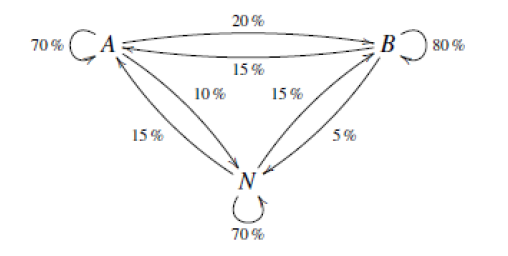


Inicialmente, HBO tiene 15 000 suscriptores, Netflix tiene 20 000 y hay 65 000 viviendas sin suscripción. Calcula cuántos suscriptores tendrá cada compañía después de 2,3 y 5 años. ¿Cuántos suscriptores tendrá cada compañía a largo plazo?